In [2]:
# This Cell for importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
# This Cell for reading data 
NETFLIX = 'netflix_titles.csv'
RATING_MAP = {
    'A': 'R',
    'UR': 'NR',
    'TV-Y7-FV': 'TV-Y7',
}
USECOLS = [ 'show_id','type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

df = pd.read_csv(filepath_or_buffer=NETFLIX, encoding='iso8859_10', usecols=USECOLS, index_col=['show_id'], )
df['rating'] = df['rating'].apply(func=lambda x: x if x not in RATING_MAP.keys() else RATING_MAP[x])


In [4]:
# filling nulls 
df.fillna('unspcified', inplace=True)

#check if there is any additional null values 
has_null = df.isnull().values.any()
print(has_null)  

#movies = df[df['type'] == 'Movie']
#series = df[df['type'] == 'TV Show']

#to make sure there isn't any other type other than movies and tv shows
#filtered_df = df.query("type != 'Movie' & type != 'TV Show'")
#filtered_df.shape
df["listed_in"] = df["listed_in"].str.split(', ')
df["cast"] = df["cast"].str.split(', ')

df.drop(["description"], axis=1)


False


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[unspcified],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries]
s2,TV Show,Blood & Water,unspcified,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",unspcified,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
s4,TV Show,Jailbirds New Orleans,unspcified,[unspcified],unspcified,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
s5,TV Show,Kota Factory,unspcified,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...
s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]"
s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]"
s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]"


In [5]:
#Catagories_ex = df['listed_in'].explode()
exploded_df = df.explode('listed_in')
dummies = pd.get_dummies(exploded_df['listed_in'])
categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([df, categories_encoded], axis=1)
#catagories  = df_encoded.iloc[:, 12:]



exploded_df = df.explode('cast')

dummies = pd.get_dummies(exploded_df['cast'])

quarter_length = len(dummies) // 4

# Split the DataFrame into four quaters since the dataframe was too big for the machine to process so I had to divide it
first_quarter = dummies.iloc[:quarter_length]
second_quarter = dummies.iloc[quarter_length:2*quarter_length]
third_quarter = dummies.iloc[2*quarter_length:3*quarter_length]
fourth_quarter = dummies.iloc[3*quarter_length:]
categories_encoded_first_quarter = first_quarter.groupby(first_quarter.index).sum()
#df_encoded = pd.concat([df, categories_encoded], axis=1)


In [7]:
categories_encoded_second_quarter = second_quarter.groupby(second_quarter.index).sum()
categories_encoded_third_quarter = third_quarter.groupby(third_quarter.index).sum()
categories_encoded_fourth_quarter = fourth_quarter.groupby(fourth_quarter.index).sum()


In [24]:
#recombined_df = pd.concat([categories_encoded_first_quarter, categories_encoded_second_quarter, categories_encoded_third_quarter, categories_encoded_fourth_quarter], ignore_index=True)
df_1 = pd.DataFrame(recombined_df)


In [25]:
recombined_df_array = df_1.to_numpy()
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(recombined_df_array)
labels = kmeans.predict(recombined_df_array)
centroids = kmeans.cluster_centers_
print("Cluster labels:", labels)
print("Centroids:", centroids)


Cluster labels: [1 1 1 ... 1 1 1]
Centroids: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.27376080e-04 1.13688040e-04 2.27376080e-04 ... 1.13688040e-04
  2.27376080e-04 1.13688040e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.71050543e-20 1.35525272e-20 2.71050543e-20 ... 1.35525272e-20
  2.71050543e-20 1.35525272e-20]]


In [26]:
df_encoded = pd.concat([df_encoded, df_1], axis=1)

In [27]:
df_encoded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,Åehsuvar AktaÅ,Åenay Bozoklar,Åenay GÃžrler,Åennur Nogaylar,Åerif Sezer,Åevket Ãoruh,Åinasi Yurtsever,ÅÃžkran OvalÄą,ÅÃžkrÃž ÃzyÄąldÄąz,áđĒáŧpášđĖ DÃŽrÃ­sÃđ
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[unspcified],United States,"September 25, 2021",2020.0,PG-13,90 min,[Documentaries],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s2,TV Show,Blood & Water,unspcified,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",unspcified,"September 24, 2021",2021.0,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s4,TV Show,Jailbirds New Orleans,unspcified,[unspcified],unspcified,"September 24, 2021",2021.0,TV-MA,1 Season,"[Docuseries, Reality TV]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s5,TV Show,Kota Factory,unspcified,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


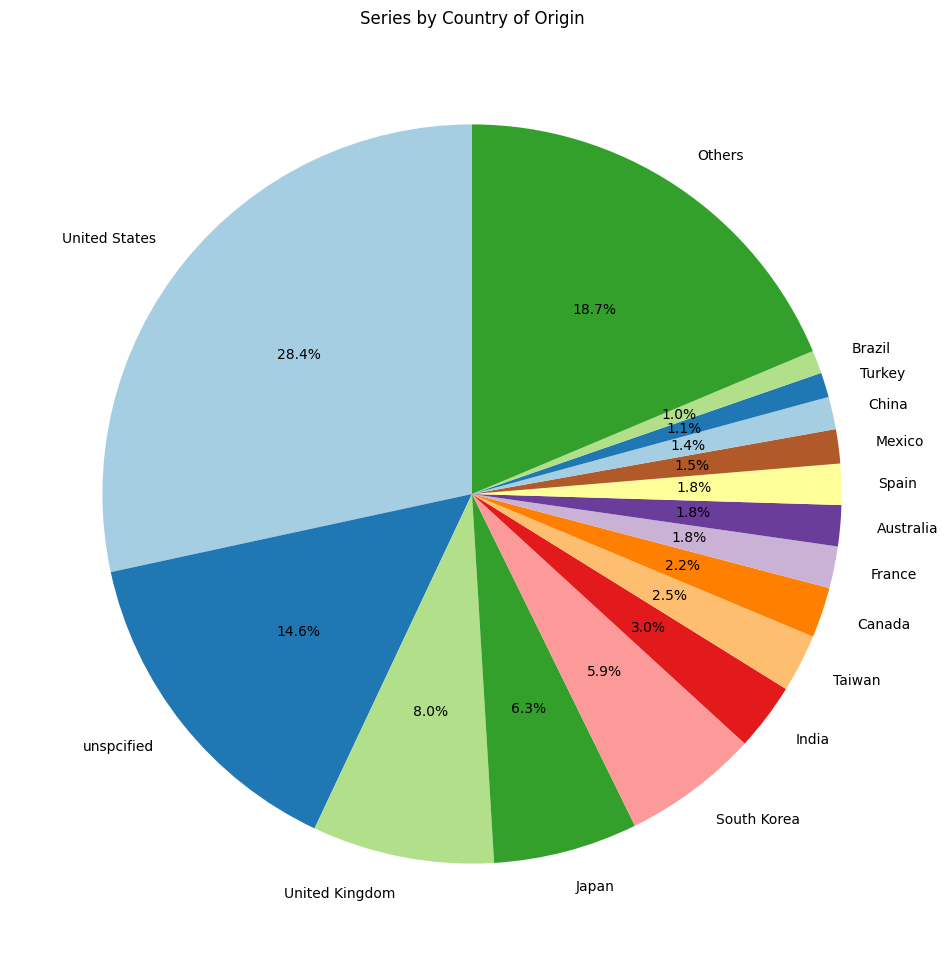

In [63]:
# This cell is for drawing a piechart to describe the percentage of Series by the country of origin 
name_counts = series['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 1
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Series by Country of Origin')
plt.show()

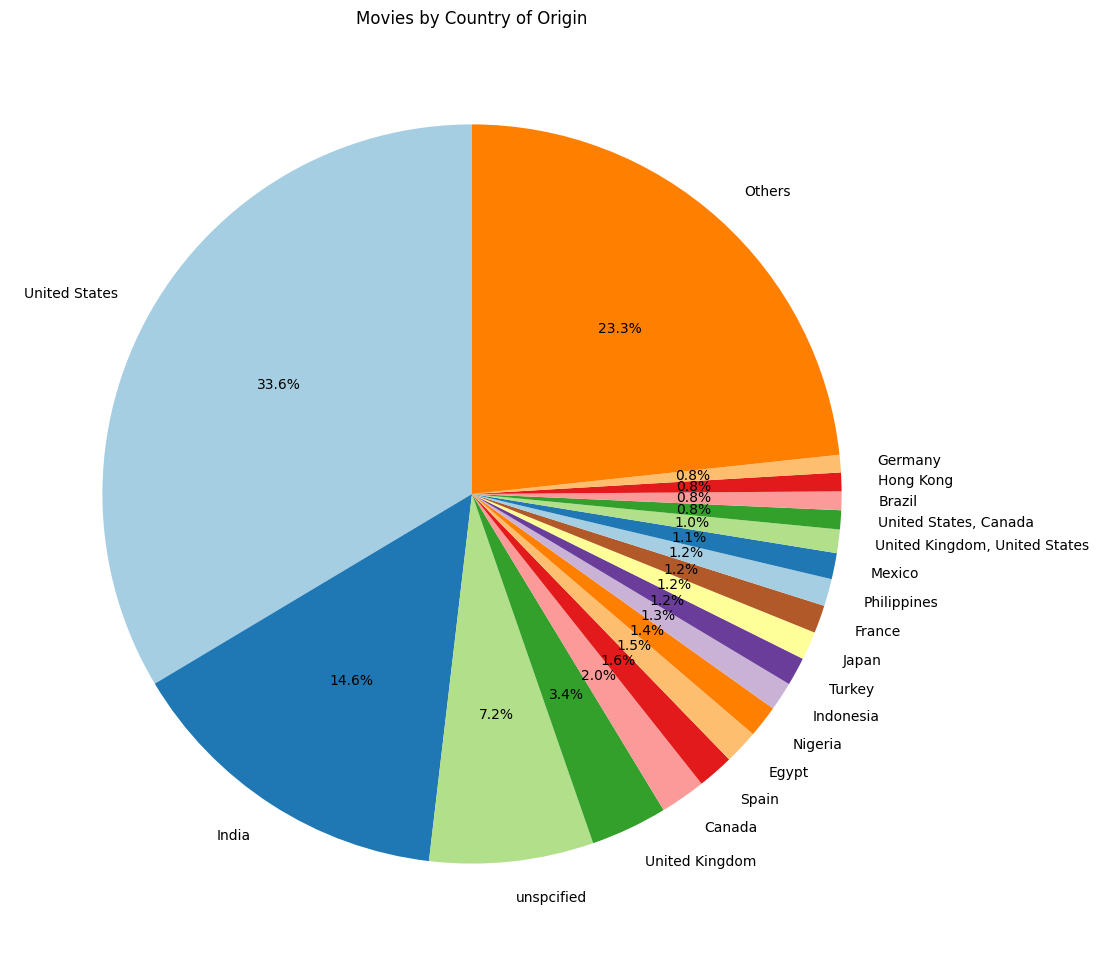

In [58]:
# This cell is for drawing a piechart to describe the percentage of Movies by the country of origin 

name_counts = movies['country'].value_counts()

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 0.75
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Movies by Country of Origin')
plt.show()

In [59]:
Catagories_ex = df['listed_in'].explode()
unique_words = set(Catagories_ex)  
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = df.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([df, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


{'Spanish-Language TV Shows', 'Crime TV Shows', 'Horror Movies', 'Horror', 'Anime Series', 'TV Sci-Fi & Fantasy', 'Independent Movies', 'Faith & Spirituality', "Kids' TV", 'Thriller', 'TV Comedies', 'Romantic TV Shows', 'Children & Family Movies', 'Anime Features', 'Stand-Up Comedy', 'Classic & Cult TV', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Comedies', 'TV Shows', 'TV Mysteries', 'Dramas', 'Sci-Fi & Fantasy', 'Korean TV Shows', 'Drama', 'Reality TV', 'Documentaries', 'Teen TV Shows', 'TV Action & Adventure', 'Action', 'International TV Shows', 'TV Thrillers', 'International Movies', 'Classic Movies', 'Science & Nature TV', 'TV Dramas', 'Docuseries', 'TV Horror', 'Action & Adventure', 'Thrillers', 'LGBTQ Movies', 'British TV Shows', 'Cult Movies', 'Music & Musicals', 'Sports Movies', 'Romantic Movies', 'Romance', 'Sci-fi'}
Unique word count: 48


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

C:\Users\obadz\AppData\Local\Temp\ipykernel_12284\2703066556.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


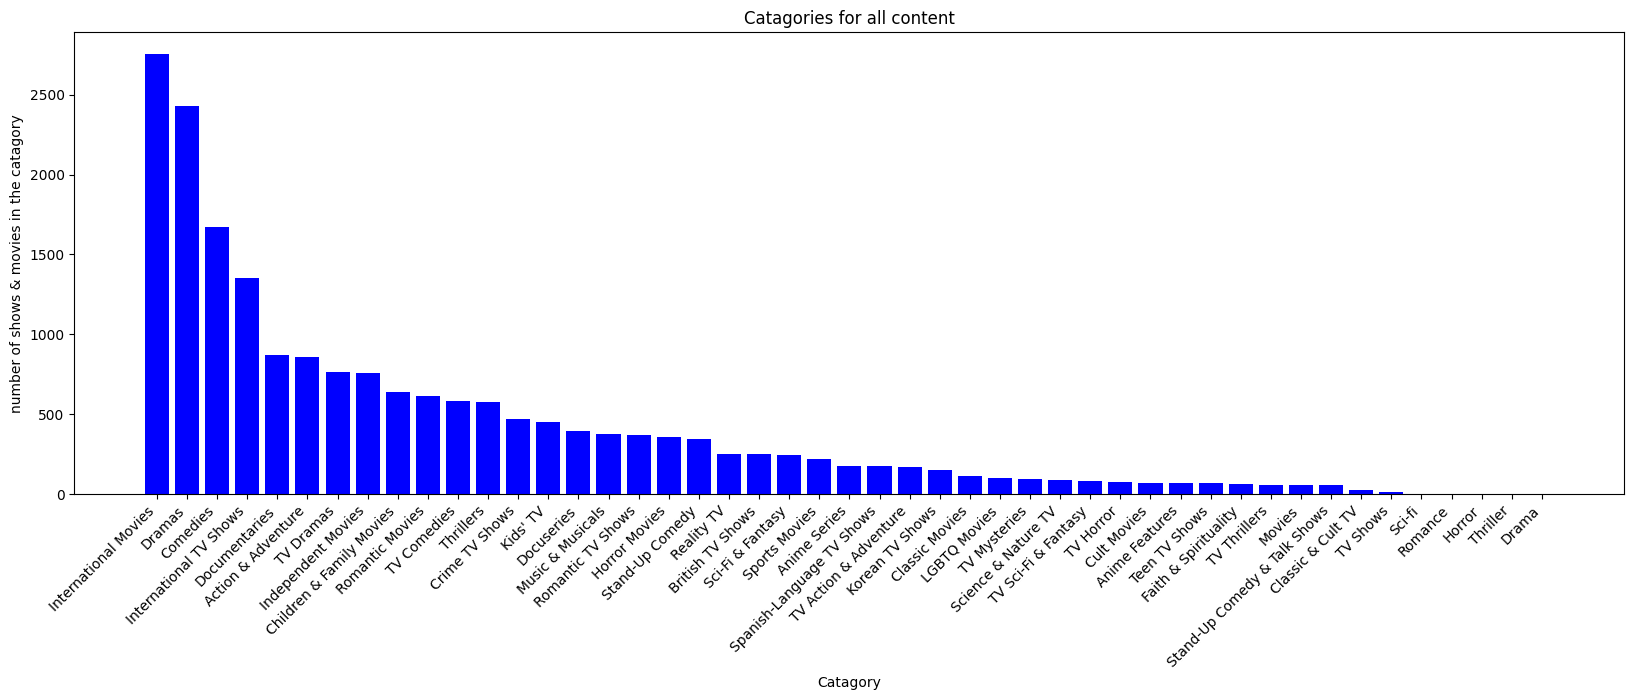

In [ ]:

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for all content')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of shows & movies in the catagory')

plt.show()


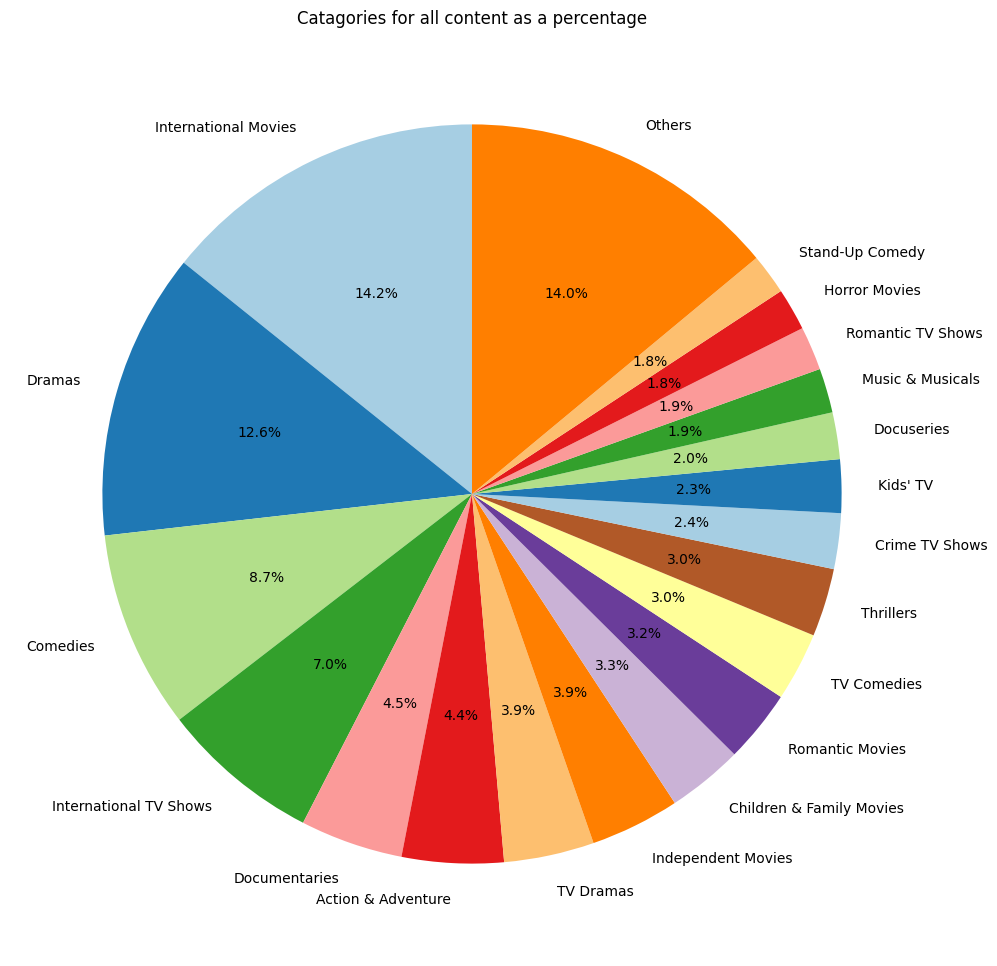

In [ ]:
name_counts = value

total = name_counts.sum()
name_percentages = (name_counts / total) * 100

# Filter small categories and sum them into 'Others'
threshold = 1.5
small_categories = name_percentages < threshold
other_countries = name_percentages[small_categories].sum()
large_categories = name_percentages[~small_categories]

# If there are any small categories, add 'Others'
if other_countries > 0:
    large_categories['Others'] = other_countries


# Create a pie chart
plt.figure(figsize=(12,12)) 
plt.pie(large_categories, labels=large_categories.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Catagories for all content as a percentage')
plt.show()

In [ ]:
movies["listed_in"] = movies["listed_in"].str.split(', ')
Catagories_ex = movies['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = movies.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([movies, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


{'Comedies', 'Independent Movies', 'Romantic Movies', 'Classic Movies', 'Children & Family Movies', 'Romance', 'Thriller', 'Movies', 'Horror Movies', 'Dramas', 'Drama', 'Action & Adventure', 'Faith & Spirituality', 'Stand-Up Comedy', 'Thrillers', 'Anime Features', 'Documentaries', 'International Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Cult Movies', 'Music & Musicals', 'LGBTQ Movies'}
Unique word count: 23


C:\Users\obadz\AppData\Local\Temp\ipykernel_12284\915330931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["listed_in"] = movies["listed_in"].str.split(', ')


C:\Users\obadz\AppData\Local\Temp\ipykernel_12284\2948576387.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


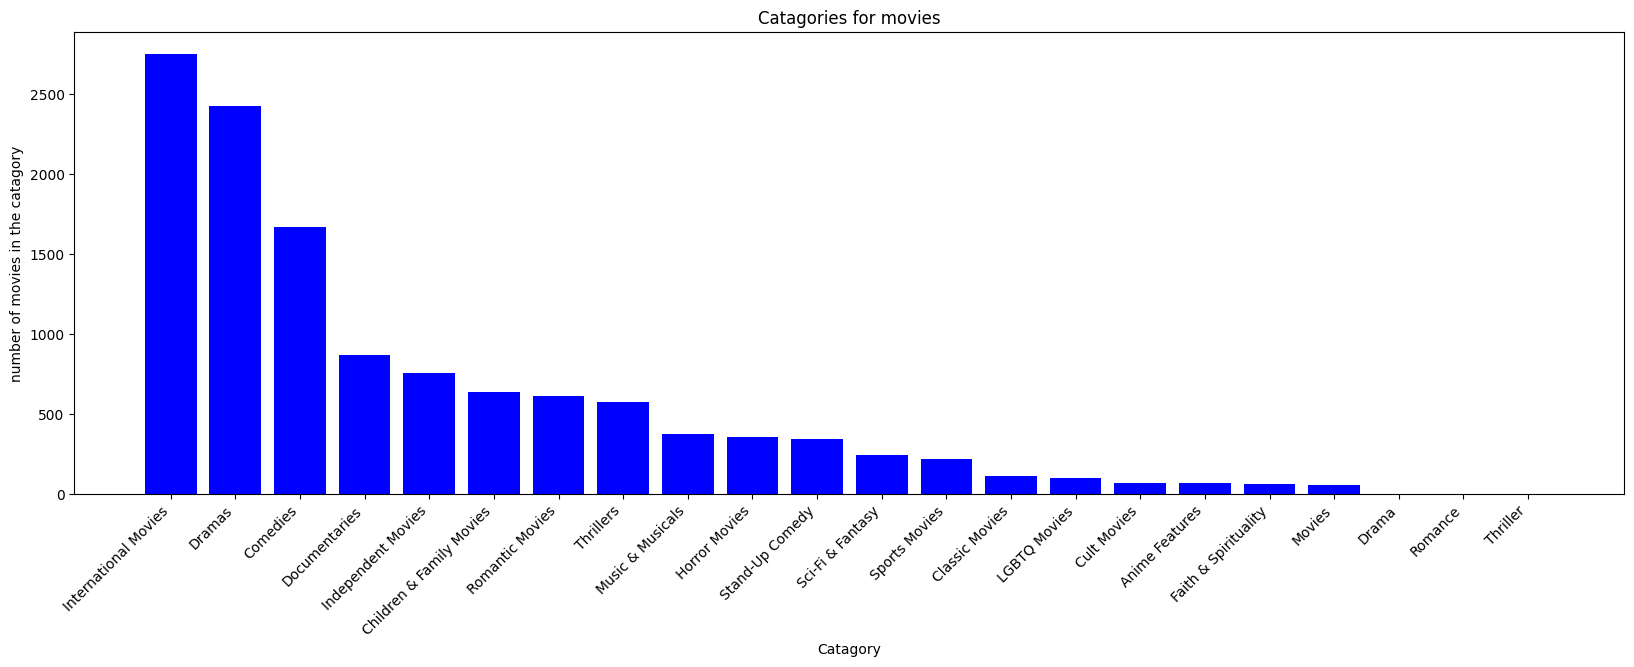

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for movies')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of movies in the catagory')

plt.show()

In [ ]:
series["listed_in"] = series["listed_in"].str.split(', ')
Catagories_ex = series['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = series.explode('listed_in')

dummies = pd.get_dummies(exploded_df['listed_in'])

categories_encoded = dummies.groupby(dummies.index).sum()
df_encoded = pd.concat([series, categories_encoded], axis=1)
catagories  = df_encoded.iloc[:, 12:]
value = catagories.sum().sort_values(ascending=0)


{'Teen TV Shows', 'International TV Shows', 'Stand-Up Comedy & Talk Shows', 'Action', "Kids' TV", 'TV Comedies', 'TV Sci-Fi & Fantasy', 'TV Action & Adventure', 'Romantic TV Shows', 'Crime TV Shows', 'Anime Series', 'Docuseries', 'Reality TV', 'TV Mysteries', 'Classic & Cult TV', 'Spanish-Language TV Shows', 'Korean TV Shows', 'British TV Shows', 'Sci-fi', 'Horror', 'TV Dramas', 'Science & Nature TV', 'TV Thrillers', 'TV Shows', 'TV Horror'}
Unique word count: 25


C:\Users\obadz\AppData\Local\Temp\ipykernel_12284\1670408985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["listed_in"] = series["listed_in"].str.split(', ')


C:\Users\obadz\AppData\Local\Temp\ipykernel_12284\4240785754.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value.index, rotation=45, ha='right')


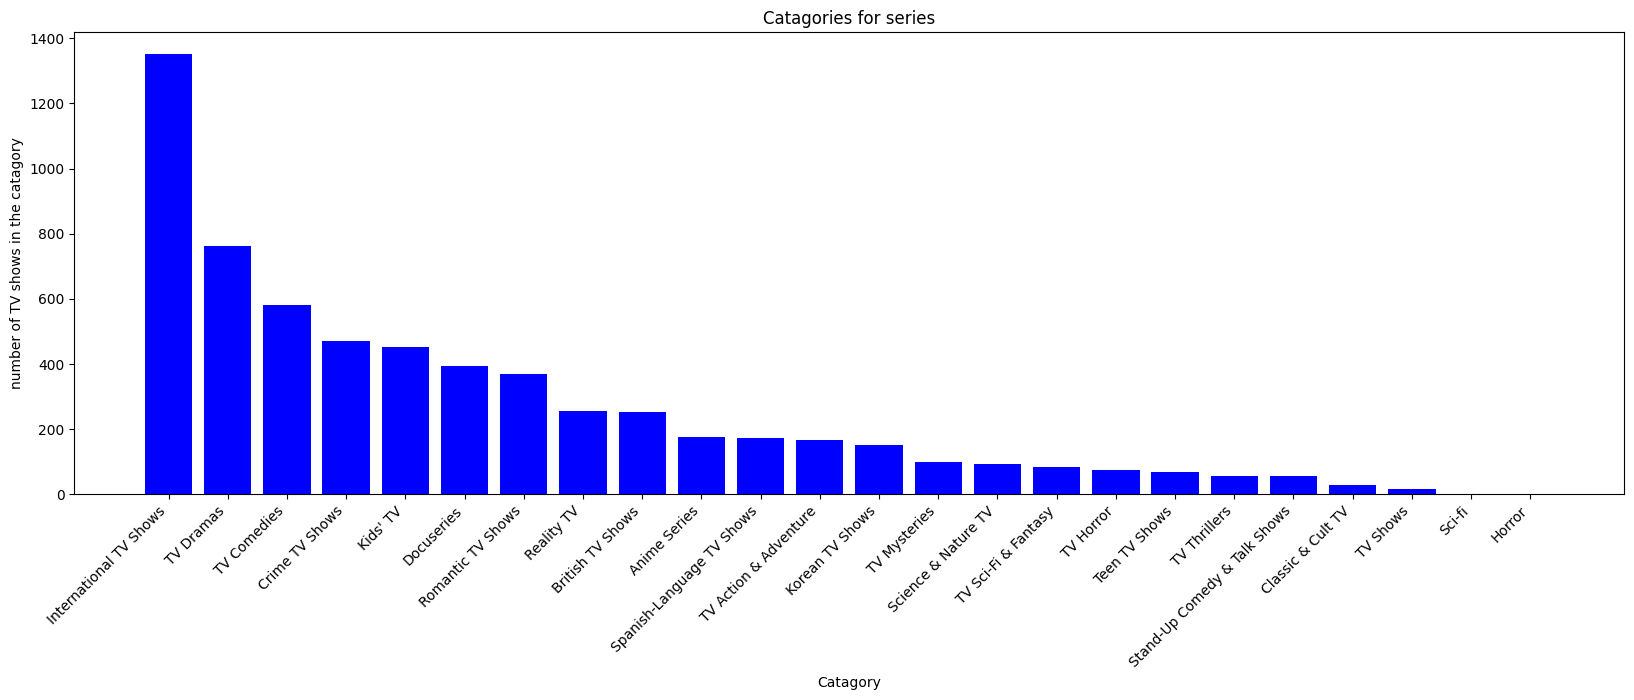

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(value.index, value, color='blue')  
ax.set_xticklabels(value.index, rotation=45, ha='right')  

ax.set_title('Catagories for series')
ax.set_xlabel('Catagory')
ax.set_ylabel('number of TV shows in the catagory')

plt.show()

In [ ]:
df["cast"] = df["cast"].str.split(', ')
Catagories_ex = series['listed_in'].explode()

unique_words = set(Catagories_ex)
print(unique_words)

unique_word_count = Catagories_ex.nunique()
print(f'Unique word count: {unique_word_count}')

exploded_df = series.explode('listed_in')


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unspcified,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,unspcified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unspcified,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,unspcified,unspcified,unspcified,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,unspcified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...
